In [1]:
%pip install praw

     |████████████████████████████████| 153kB 5.7MB/s 
     |████████████████████████████████| 204kB 26.0MB/s 


# Social Media Data Analysis With Reddit

Reddit is a forum-like social media platform where users post their submissions  (text, image, video, gifs, links etc.) under various subreddits. Our purpose is to analyze data collected from Reddit to get insights from the most popular 10 subreddits.

We are going to analyze the data in several steps:
* First, we will analyze the upvote ratios to determine the controversial posts in `r/popular`. 
* In the next step, we will analyze the comments of submissions with lowest upvotes ratios.
* Then, by counting how many times a subreddit appeared on `r/popular`, we will find the top 10 subreddits. 
* After that, we will analyze the submissions from each top 10 subreddits and compare their scores and number of comments.
 

## Preparation

First we make import libraries, get our client id and secret.  
Here, we use unofficial Reddit API tool 'Python Reddit Access Wrapper (PRAW)'. 

In [2]:
# username: cmpe2051angrybirds
# password: angrybirds

import numpy as np
import pandas as pd
import praw
import nltk
import matplotlib.pyplot as plt
from datetime import datetime

client_id = 'a1JhjlLlwNSz_Q'
secret = 'B7DQQYCVPTh-Wi_SExgdCWrpb6t7TQ'

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Next, we instantiate a Reddit class.  
Also, we set the period to `"month"` for top submissions.  

In [3]:
redd = praw.Reddit(
    client_id=client_id,
    client_secret=secret,
    user_agent='AngryBirds_TermProject'
)

period = 'month'

## Data Collection

Now, we create an empty dataframe with columns:

1. Id
2. Title
3. Author
4. Score
5. Upvote Ratio (= Upvotes/Total Votes)
6. Number of Comments
7. Subreddit
8. Permalink
9. Created (UTC)

Next, we collect top 1000 submissions of the last month in the subreddit `r/popular` (*).  
Then, we populate the dataframe with the metadata of these posts.  

**Caution:** Since, we are fetching up to 1000 submissions, it may take some time.  

(*)Brief information about `r/popular`: Although there are countless subreddits on Reddit, there are some special subreddits moderated by the Reddit administrators. `r/popular` and `r/all` are two of them. `r/all` contains submissions with high score from all over Reddit. `r/popular` is almost same as `r/all` except it is filtered down so that it does not contain fake information, explicit etc. content. That is, `r/popular` is a nicer looking version of `r/all`. That's why we are fetching submissions appearing on `r/popular`.

In [5]:
#df = pd.read_pickle('reddit_data.pkl')
df = pd.DataFrame({'id':[],'title':[], 'author':[], 'score':[], 'upvote_ratio':[], 'num_comments':[], 'subreddit':[], 'permalink':[], 'created_utc':[]})
popular = redd.subreddit('popular')
counter = 0
i = 0

for submission in popular.top(period,limit=1000):
    if i >= 100:
        print('Fetched {} records'.format(counter))
        i = 0

    df = df.append({
        'id': submission.id,
        'title': submission.title,
        'author': submission.author,
        'score': submission.score,
        'upvote_ratio': submission.upvote_ratio,
        'num_comments': submission.num_comments,
        'subreddit': submission.subreddit.display_name,
        'permalink': submission.permalink,
        'created_utc': str(datetime.fromtimestamp(int(float(submission.created_utc))))
    }, ignore_index=True)
    counter = counter + 1
    i = i + 1
    
#df.to_pickle('reddit_data.pkl')
df.head()

Fetched 100 records
Fetched 200 records
Fetched 300 records
Fetched 400 records
Fetched 500 records
Fetched 600 records
Fetched 700 records
Fetched 800 records


,id,title,author,score,upvote_ratio,num_comments,subreddit,permalink,created_utc
0,jr5wtk,"""Are you sure you want to go back to the Old V...",lapapinton,194756.0,0.88,4996.0,funny,/r/funny/comments/jr5wtk/are_you_sure_you_want...,2020-11-09 20:43:45
1,k4qide,An anti-gay Hungarian politician has resigned ...,stem12345679,194886.0,0.90,8324.0,worldnews,/r/worldnews/comments/k4qide/an_antigay_hungar...,2020-12-01 18:15:32
2,juqm4s,There are massive floods in southeast Mexico r...,m3antar,189949.0,0.93,1808.0,nextfuckinglevel,/r/nextfuckinglevel/comments/juqm4s/there_are_...,2020-11-15 18:25:46
3,jv4nra,Every time,ZyleErelis,170256.0,0.95,2279.0,memes,/r/memes/comments/jv4nra/every_time/,2020-11-16 10:33:42
4,jvawxo,Been gaming with this dude for 15 years. Since...,ghost_knight1121,166668.0,0.86,3584.0,gaming,/r/gaming/comments/jvawxo/been_gaming_with_thi...,2020-11-16 17:29:50


## Analyzing the upvote ratios to determine controversial submissions.

Let's begin to analyze the data.
Before we find the top 10 subreddit, we will look at the upvote ratios to determine whether there is any controversial submission. Because if a submission has low upvote ratio, it means that the content is not very popular.

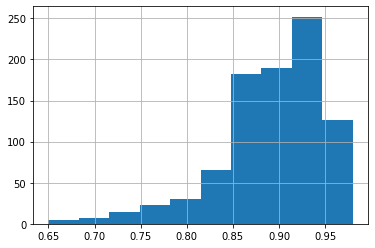

In [6]:
df.upvote_ratio.hist()

It looks like majority of the submissions have upvote ratio larger than 0.84.  
So, we seperate the submission accordingly.  

In [7]:
low_ratio = df[df.upvote_ratio < .84]
high_ratio = df[df.upvote_ratio >= .84]

total = df.shape[0]
low_count = low_ratio.shape[0]
high_count = high_ratio.shape[0]

low_percent = low_count / total * 100
high_percent = high_count / total * 100

print('Percentage of the submissions with upvote ratio lower than %84: ' + str(low_percent))
print('Percentage of the submissions with upvote ratio higher than %84: ' + str(high_percent))
print('')
print('Subreddit of the submissions with low upvote ratio:')
print(low_ratio.subreddit.value_counts())

Percentage of the submissions with upvote ratio lower than %84: 13.870246085011187
Percentage of the submissions with upvote ratio higher than %84: 86.12975391498881

Subreddit of the submissions with low upvote ratio:
pics                    33
WhitePeopleTwitter      11
news                     9
gaming                   9
worldnews                6
funny                    5
politics                 5
PoliticalHumor           5
aww                      4
facepalm                 4
MurderedByWords          3
AskReddit                3
nextfuckinglevel         3
memes                    2
gifs                     2
insanepeoplefacebook     2
PublicFreakout           2
BlackPeopleTwitter       2
Showerthoughts           2
WatchPeopleDieInside     1
Cringetopia              1
MadeMeSmile              1
science                  1
iamatotalpieceofshit     1
mildlyinfuriating        1
Unexpected               1
MurderedByAOC            1
wholesomememes           1
LifeProTips              

## Analyzing the most controversial 10 submissions

Now, we will sort the rows of `df` by `upvote_ratios` in ascending order and pick the top 10 submissions.

In [8]:
controversial = df.sort_values(by='upvote_ratio',ascending=True)[:10]
controversial

,id,title,author,score,upvote_ratio,num_comments,subreddit,permalink,created_utc
333,ju82uy,Two Navajo women exercising their 1st amendmen...,DontSearchMyBasement,99449.0,0.65,4327.0,pics,/r/pics/comments/ju82uy/two_navajo_women_exerc...,2020-11-14 19:53:23
173,k5cand,Hopefully this will put an end to Trump's elec...,Spicylemon,113870.0,0.66,3890.0,pics,/r/pics/comments/k5cand/hopefully_this_will_pu...,2020-12-02 16:19:23
803,k49zt4,Update from previous post. After giving up gam...,Hannibal_Hector,79602.0,0.66,2196.0,gaming,/r/gaming/comments/k49zt4/update_from_previous...,2020-12-01 01:03:33
485,jrxt5o,Tim Allen just posted this and said this alway...,holyfruits,90136.0,0.68,3261.0,pics,/r/pics/comments/jrxt5o/tim_allen_just_posted_...,2020-11-11 00:51:54
343,jt0f43,Joe Biden with a beard needs to be a thing,idea4granted,98975.0,0.68,5193.0,pics,/r/pics/comments/jt0f43/joe_biden_with_a_beard...,2020-11-12 18:46:04
330,jvfkmc,Joe Biden’s 1967 Corvette which was gifted to ...,TetraCGT,99503.0,0.70,5330.0,pics,/r/pics/comments/jvfkmc/joe_bidens_1967_corvet...,2020-11-16 21:26:40
456,k1ncfz,"40th birthday, my wife is sick, my newest cons...",scraffe,91944.0,0.70,2736.0,gaming,/r/gaming/comments/k1ncfz/40th_birthday_my_wif...,2020-11-26 21:03:10
744,js5lwk,Time Is Running Out,dittidot,81152.0,0.70,1956.0,pics,/r/pics/comments/js5lwk/time_is_running_out/,2020-11-11 10:10:25
757,jtixgo,In front of the White House now,ohnoh18,80717.0,0.70,5818.0,pics,/r/pics/comments/jtixgo/in_front_of_the_white_...,2020-11-13 16:33:31
375,jxelim,A photo of the presidents and their dog.,D0NW0N,96350.0,0.70,2010.0,pics,/r/pics/comments/jxelim/a_photo_of_the_preside...,2020-11-20 00:12:08


Next, we put all the title in `controversial` into `text`.

In [9]:
text = ' '.join(controversial.title.tolist())

Next, we put all the comments in each submission in `controversial` into `text`.

**Caution**: We are fetching a lot of data. It may take some time.

In [10]:
for _id in controversial.id.tolist():
  submission = redd.submission(_id)
  submission.comment_sort = 'best' # or we can use 'controversial' to get the comments with the most downvotes.
  submission.comment_limit = 100
  submission.comments.replace_more(limit=0) # this is a trick so that `comments.list()` below returns list of objects of the `comment` class, not the `MoreComments` class
  text = text + ' '.join([comm.body for comm in submission.comments.list()])
  print('Fetched comments for {}'.format(_id))

Fetched comments for ju82uy
Fetched comments for k5cand
Fetched comments for k49zt4
Fetched comments for jrxt5o
Fetched comments for jt0f43
Fetched comments for jvfkmc
Fetched comments for k1ncfz
Fetched comments for js5lwk
Fetched comments for jtixgo
Fetched comments for jxelim


Next, we filter `text` and calculate frequency distribution. Then, pick the most frequent 20 words.


In [14]:
from nltk.corpus import stopwords

my_stopwords = [
                'like', 'would', 'one', 'people', 'get', 'time', 'even', 'got',
                'never', 'know', 'really', 'think', 'first', 'good', 'also', 
                'still', 'its'
]

def clean(word):
  if word[-1] == '.':
    word = word[:-1]

  if word[-2:] == "'s":
    word = word[:-2]

  if word[-2:] == '’s':
    word = word[:-2]

  return word

def filter(word):
  if word in my_stopwords:
    return False

  if word in stopwords.words('english'):
    return False

  if word.startswith('http://'):
    return False

  if word.startswith('https://'):
    return False

  return True

words = text.lower().split()
words = [clean(word) for word in words]
clean = [word for word in words if filter(word)]
freq = nltk.FreqDist(clean)

In [16]:
freq.pprint(maxlen=20)

FreqDist({'trump': 93, 'biden': 40, 'way': 38, 'years': 34, 'president': 34, "i'm": 32, 'right': 31, 'white': 31, 'much': 31, 'love': 31, 'say': 31, 'see': 30, 'could': 30, 'going': 30, 'look': 29, 'ever': 29, 'said': 28, 'something': 28, 'fucking': 28, 'shit': 28, ...})


## Findind the top 10 subreddits

Next, we count how many times subreddits have appeared on the top 1000 submissions from the last month and pick the top ten subreddits.

In [ ]:
best_subreddits = df.subreddit.value_counts()
best_subreddits[:10]

Now, in order to analyze the top 10 individual subreddits, we create a dictionary where each key is the name of the subreddit and the corresponding value is a dataframe populated by the metadata of the top 50 submissions of the last month.

**Caution**: We are fetching a lot of data. It may take some time.

In [ ]:
top_ten_subs = best_subreddits.index.values.tolist()[:10]
sub_data = dict()
for sub in top_ten_subs:
    sub_data[sub] = pd.read_pickle('{}.pkl'.format(sub))
    
    #sub_data[sub] = pd.DataFrame({'id':[],'title':[], 'author':[], 'score':[], 'upvote_ratio':[], 'num_comments':[], 'permalink':[], 'created_utc':[]})
    
    #for submission in redd.subreddit(sub).top(period, limit=50):
    #    sub_data[sub] = sub_data[sub].append({
    #        'id': submission.id,
    #        'title': submission.title,
    #        'author': submission.author,
    #        'score': submission.score,
    #        'upvote_ratio': submission.upvote_ratio,
    #        'num_comments': submission.num_comments,
    #        'permalink': submission.permalink,
    #        'created_utc': str(datetime.fromtimestamp(int(float(submission.created_utc))))
    #    }, ignore_index=True)
        
    print('Finished collecting data for {}'.format(sub))
        
    #sub_data[sub].to_pickle('{}.pkl'.format(sub))

In [ ]:
# Example
#sub_data['memes'].head()

### Statistical analysis of the score in the top 10 subreddits

We want to compare the popularity between the top 10 subreddits. We do this by analyzing the score of the submissions.



We look up the maximum, minimum, mean, median and standard deviation of the scores of the submissions in the previos dataframes.

In [ ]:
max_scores = [sub_data[sub].score.max() for sub in top_ten_subs]
mean_scores = [sub_data[sub].score.mean() for sub in top_ten_subs]
median_scores = [sub_data[sub].score.median() for sub in top_ten_subs]
min_scores = [sub_data[sub].score.min() for sub in top_ten_subs]
std_scores = [sub_data[sub].score.std() for sub in top_ten_subs]

top_ten_scores = pd.DataFrame({
    'Min': min_scores,
    'Max': max_scores,
    'Median': median_scores,
    'Mean': mean_scores,
    'Std Deviation': std_scores,
    'Std Dev / Mean': np.array(std_scores) / np.array(mean_scores)
}, index=top_ten_subs)

top_ten_scores

Here, we plot the scores of the individual submissions.

In [ ]:
plt.figure(figsize=(10,5))
for sub in top_ten_subs:
    plt.plot(sub_data[sub].score.sort_values(ascending=True,ignore_index=True), label=sub)

plt.xlabel('Submission Number')   
plt.ylabel('Upvotes')
plt.grid()
plt.legend()
plt.show()

### Statistical analysis of the number of comments in the top 10 subreddits.

Now, we want to find where the most discussion happens. We do this by comparing the number of comments.

In [ ]:
max_num_comments = [sub_data[sub].num_comments.max() for sub in top_ten_subs]
mean_num_comments = [sub_data[sub].num_comments.mean() for sub in top_ten_subs]
median_num_comments = [sub_data[sub].num_comments.median() for sub in top_ten_subs]
min_num_comments = [sub_data[sub].num_comments.min() for sub in top_ten_subs]
std_num_comments = [sub_data[sub].num_comments.std() for sub in top_ten_subs]

top_ten_num_comments = pd.DataFrame({
    'Min': min_num_comments,
    'Max': max_num_comments,
    'Median': median_num_comments,
    'Mean': mean_num_comments,
    'Standard Deviation': std_num_comments,
    'Std Dev / Mean': np.array(std_num_comments) / np.array(mean_num_comments) 
}, index=top_ten_subs)

top_ten_num_comments

Here, plotting the number of comment for each individual submission.

In [ ]:
plt.figure(figsize=(10,5))
for sub in top_ten_subs:
    plt.plot(sub_data[sub].num_comments.sort_values(ascending=True,ignore_index=True), label=sub)

plt.xlabel('Submission Number')   
plt.ylabel('Number of Comments')
plt.grid()
plt.legend()
plt.show()